In [1]:
import math
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [41]:
b = 1
c = 5
system = signal.lti([b, 1], [1, c, b, b*c]) # (1+bp)x = (1+bp^2)(1+cp)y

In [42]:
# АЧХ = sqrt(1 + (bw)^2)/(1 - bw^2)/sqrt(1 + (cw)^2)
# ФЧХ = arctg(bw) - arctg(cw)

In [43]:
def drowYout(system, freq=1, mag=1, T_min=0, T_max=100, T_num=1e4 + 1):
    """Drows output signal with given initial frequency and magnitude"""
    T= np.linspace(T_min,T_max,T_num)
    S = [ mag*math.sin( t*2*math.pi*freq ) for t in T ]
    
    Tout, yout, xout = signal.lsim(system, S, T)
    plt.figure()
    plt.plot(Tout, yout)
    plt.show()    

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


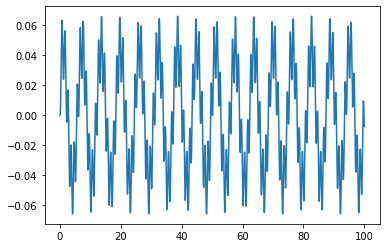

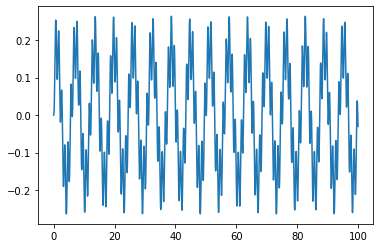

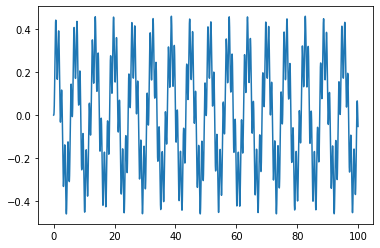

In [44]:
# constant frequency
freq = 1

for mag in range(1,10,3):
    drowYout(system, freq=freq, mag=mag)
    
# судя по графикам амплитуда выходного сигнала увеличивается при увеличении исходной,
# а фаза остаётся неизменной

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


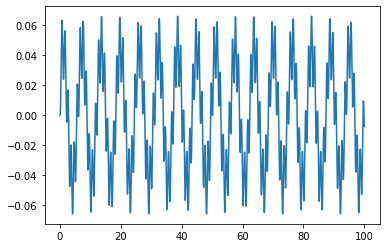

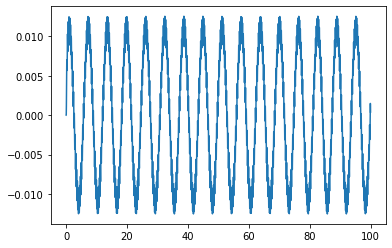

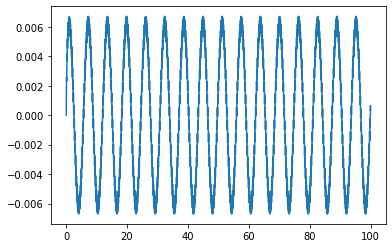

In [45]:
# constant magnitude
mag = 1

for freq in range(1,10,3):
    drowYout(system, freq=freq, mag=mag)
    
# амплитуда уменьшается 
# частота прежняя

In [46]:
def plot(x,y,mod='plot'):
    """Plots"""
    plt.figure()
    if('semilogx' == mod):
        plt.semilogx(x,y)
    else:
        plt.plot(x,y)
    plt.show()    

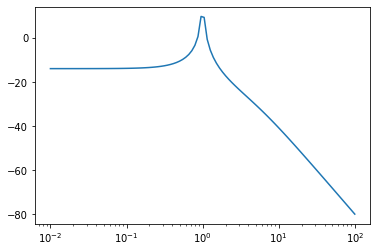

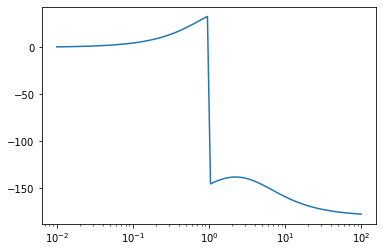

In [47]:
# АЧХ и ФЧХ
w, mag, phase = signal.bode(system)
plot(w,mag,mod='semilogx')
plot(w,phase,mod='semilogx')

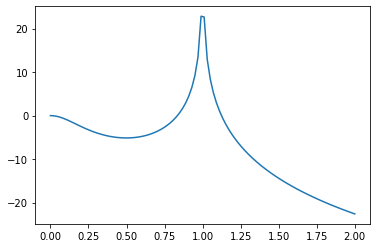

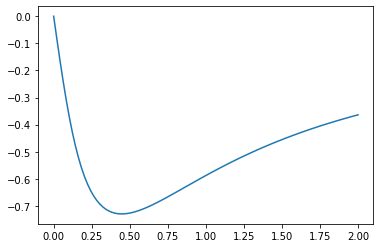

In [48]:
# моё АЧХ и ФЧХ
w = np.linspace(0,2,100)
A = [20*math.log10( math.sqrt(1+(b*t)**2)/( abs(1-b*t**2)*math.sqrt(1+(c*t)**2) ) ) for t in w]
phi = [math.atan(b*t)- math.atan(c*t) for t in w]

plot(w, A)
plot(w, phi)

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


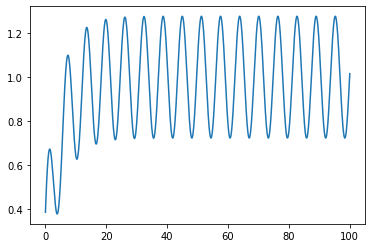

In [49]:
# h(t) = 1 + (bc - c^2)/(b + c^2)*e^(-t/c) + sin...
T= np.linspace(0,100,1e4 + 1)

coef1 = (b*c - c**2)/(b + c**2)
coef2 = b**(3/2)/(b + c**2)*math.sqrt( (1 - c)**2 + (c + b)**2/b )
shift = math.atan( (1 - c)/(c + b)*b**0.5 )
h = [ 1 + coef1*math.exp(-t/c) + coef2*math.sin(t/b**0.5 - shift) for t in T ]

plot(T, h)

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


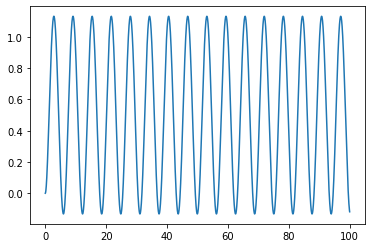

In [50]:
# реакция на ступеньку
T= np.linspace(0,100,1e4 + 1)
S = np.ones_like(T)

Tout, yout, xout = signal.lsim(model, S, T)
plot(Tout,yout)